# Ford Data Set from Kaggle


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
data = pd.read_csv('ford Car Datasets.csv', parse_dates =["year"])

data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017-01-01,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018-01-01,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017-01-01,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019-01-01,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019-01-01,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017-01-01,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014-01-01,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015-01-01,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018-01-01,8299,Manual,5007,Petrol,145,57.7,1.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   model         17966 non-null  object        
 1   year          17966 non-null  datetime64[ns]
 2   price         17966 non-null  int64         
 3   transmission  17966 non-null  object        
 4   mileage       17966 non-null  int64         
 5   fuelType      17966 non-null  object        
 6   tax           17966 non-null  int64         
 7   mpg           17966 non-null  float64       
 8   engineSize    17966 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [4]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
data.columns
data['year'] = data.year.dt.year

## Explorative Data Analysis Univarate

In [6]:
data.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,17966,17966.000000,17966.000000,17966,17966.000000,17966,17966.000000,17966.000000,17966.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,15518,NaN,12179,NaN,NaN,NaN
mean,NaN,2016.866470,12279.534844,NaN,23362.608761,NaN,113.329456,57.906980,1.350807
std,NaN,2.050336,4741.343657,NaN,19472.054349,NaN,62.012456,10.125696,0.432367
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,20.800000,0.000000
25%,NaN,2016.000000,8999.000000,NaN,9987.000000,NaN,30.000000,52.300000,1.000000
50%,NaN,2017.000000,11291.000000,NaN,18242.500000,NaN,145.000000,58.900000,1.200000
75%,NaN,2018.000000,15299.000000,NaN,31060.000000,NaN,145.000000,65.700000,1.500000


In [7]:
data['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [8]:
data['model'].describe()

count       17966
unique         24
top        Fiesta
freq         6557
Name: model, dtype: object

In [9]:
data['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [106]:
data['model'].value_counts(normalize = True)*100

 Fiesta                   36.496716
 Focus                    25.537126
 Kuga                     12.384504
 EcoSport                  6.362017
 C-MAX                     3.022376
 Ka+                       2.955583
 Mondeo                    2.927752
 B-MAX                     1.975955
 S-MAX                     1.647556
 Grand C-MAX               1.374819
 Galaxy                    1.269064
 Edge                      1.157742
 KA                        1.107648
 Puma                      0.445286
 Tourneo Custom            0.384059
 Grand Tourneo Connect     0.328398
 Mustang                   0.317266
 Tourneo Connect           0.183680
 Fusion                    0.089057
 Streetka                  0.011132
 Ranger                    0.005566
 Escort                    0.005566
 Transit Tourneo           0.005566
Focus                      0.005566
Name: model, dtype: float64

[Text(0, 0, ' Fiesta'),
 Text(1, 0, ' Focus'),
 Text(2, 0, ' Puma'),
 Text(3, 0, ' Kuga'),
 Text(4, 0, ' EcoSport'),
 Text(5, 0, ' C-MAX'),
 Text(6, 0, ' Mondeo'),
 Text(7, 0, ' Ka+'),
 Text(8, 0, ' Tourneo Custom'),
 Text(9, 0, ' S-MAX'),
 Text(10, 0, ' B-MAX'),
 Text(11, 0, ' Edge'),
 Text(12, 0, ' Tourneo Connect'),
 Text(13, 0, ' Grand C-MAX'),
 Text(14, 0, ' KA'),
 Text(15, 0, ' Galaxy'),
 Text(16, 0, ' Mustang'),
 Text(17, 0, ' Grand Tourneo Connect'),
 Text(18, 0, ' Fusion'),
 Text(19, 0, ' Ranger'),
 Text(20, 0, ' Streetka'),
 Text(21, 0, ' Escort'),
 Text(22, 0, ' Transit Tourneo'),
 Text(23, 0, 'Focus')]

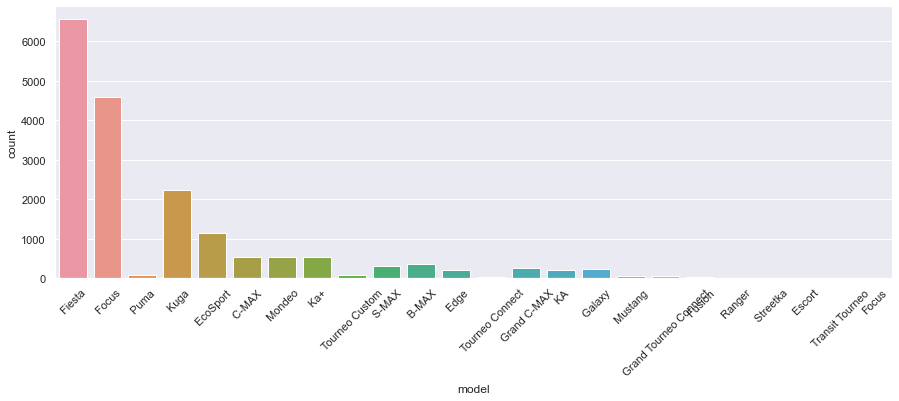

In [107]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'model', data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### Postgres to transform the data

In [108]:
data.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


In [109]:
data['price'].describe()

count    17966.000000
mean     12279.534844
std       4741.343657
min        495.000000
25%       8999.000000
50%      11291.000000
75%      15299.000000
max      54995.000000
Name: price, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

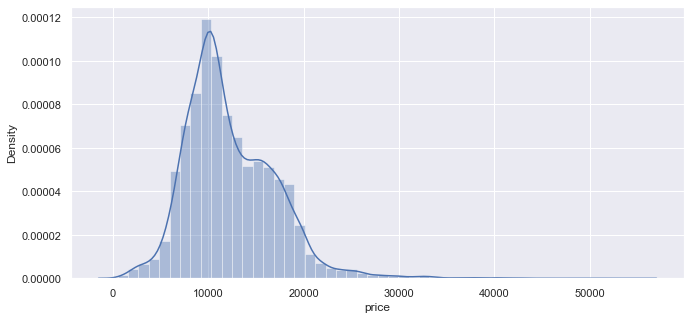

In [110]:
plt.figure(figsize =(11,5))
sns.distplot(data['price'])

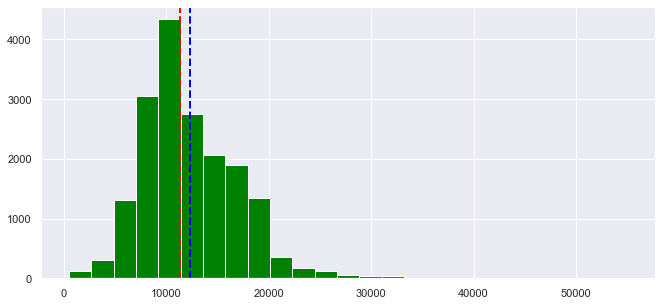

In [111]:
plt.figure(figsize =(11,5))
plt.hist(data['price'], color='green', bins =25)
plt.axvline(data['price'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(data['price'].median(), color ='red', linestyle = 'dashed', linewidth = 2)


<AxesSubplot:>

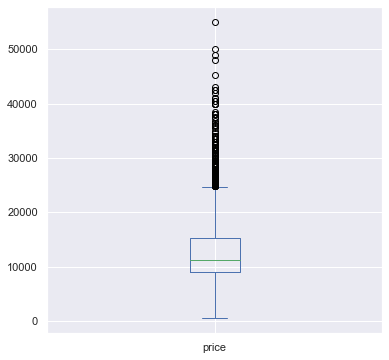

In [112]:
data['price'].plot(kind = 'box', figsize = (6,6))

In [113]:
data['transmission'].describe()

count      17966
unique         3
top       Manual
freq       15518
Name: transmission, dtype: object

In [114]:
data['transmission'].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [115]:
data['transmission'].value_counts(normalize = True)*100

Manual       86.374262
Automatic     7.575420
Semi-Auto     6.050317
Name: transmission, dtype: float64

[Text(0, 0, 'Automatic'), Text(1, 0, 'Manual'), Text(2, 0, 'Semi-Auto')]

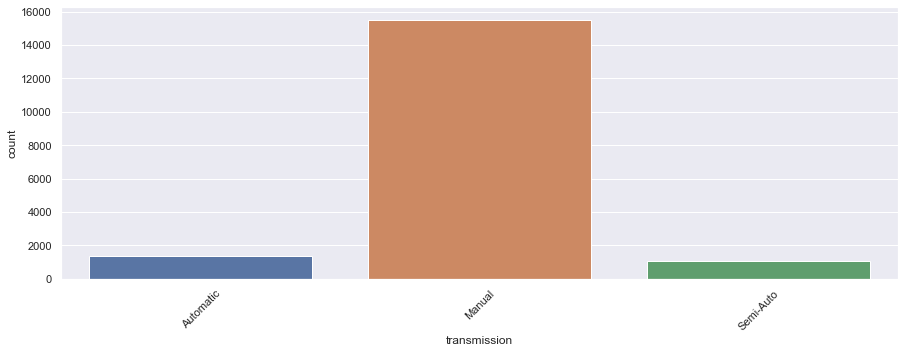

In [116]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'transmission', data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [117]:
data['mileage'].describe()

count     17966.000000
mean      23362.608761
std       19472.054349
min           1.000000
25%        9987.000000
50%       18242.500000
75%       31060.000000
max      177644.000000
Name: mileage, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mileage', ylabel='Density'>

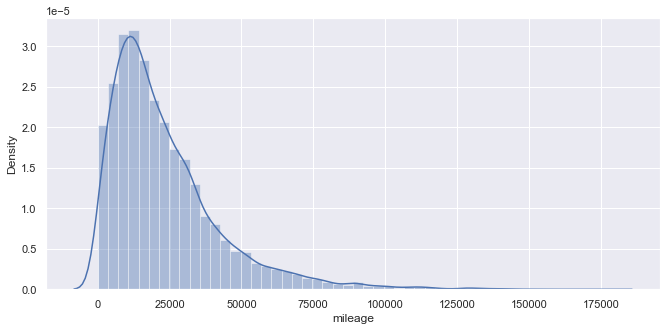

In [118]:
plt.figure(figsize =(11,5))
sns.distplot(data['mileage'])

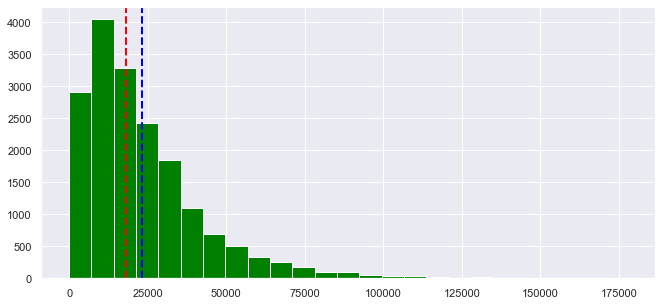

In [119]:
plt.figure(figsize =(11,5))
plt.hist(data['mileage'], color='green', bins =25)
plt.axvline(data['mileage'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(data['mileage'].median(), color ='red', linestyle = 'dashed', linewidth = 2)


<AxesSubplot:>

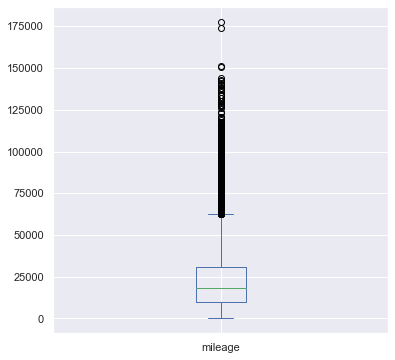

In [120]:
data['mileage'].plot(kind = 'box', figsize = (6,6))

In [121]:
data['fuelType'].describe()

count      17966
unique         5
top       Petrol
freq       12179
Name: fuelType, dtype: object

In [122]:
data['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [123]:
data['fuelType'].value_counts(normalize = True)*100

Petrol      67.789157
Diesel      32.071691
Hybrid       0.122454
Electric     0.011132
Other        0.005566
Name: fuelType, dtype: float64

[Text(0, 0, 'Petrol'),
 Text(1, 0, 'Diesel'),
 Text(2, 0, 'Hybrid'),
 Text(3, 0, 'Electric'),
 Text(4, 0, 'Other')]

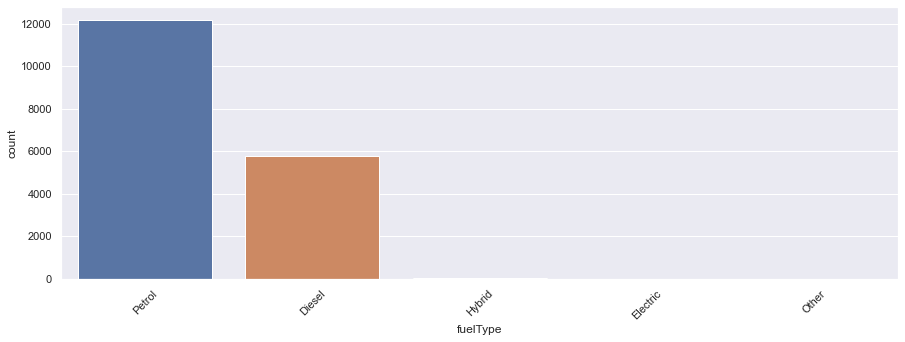

In [124]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'fuelType', data = data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [125]:
data['tax']

0        150
1        150
2        150
3        145
4        145
        ... 
17961    150
17962     30
17963     20
17964    145
17965     22
Name: tax, Length: 17966, dtype: int64

In [126]:
data['tax'].describe()

count    17966.000000
mean       113.329456
std         62.012456
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tax', ylabel='Density'>

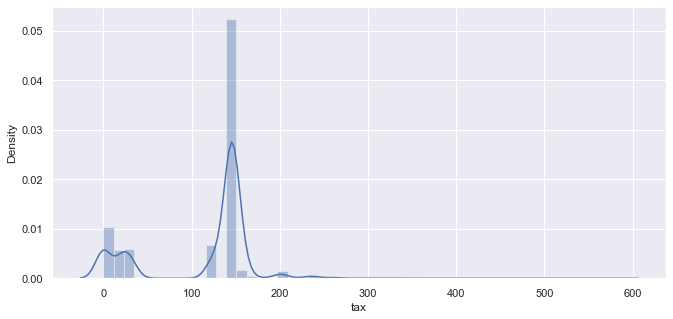

In [127]:
plt.figure(figsize =(11,5))
sns.distplot(data['tax'])

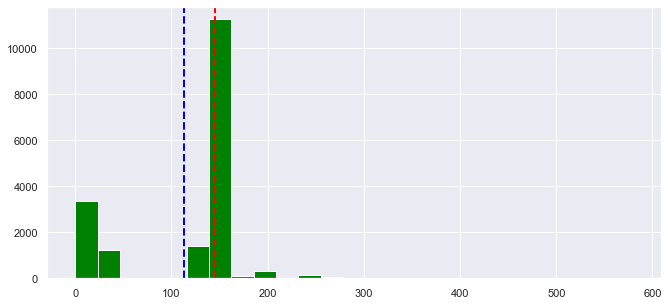

In [128]:
plt.figure(figsize =(11,5))
plt.hist(data['tax'], color='green', bins =25)
plt.axvline(data['tax'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(data['tax'].median(), color ='red', linestyle = 'dashed', linewidth = 2)


In [129]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [130]:
data['mpg'].describe()

count    17966.000000
mean        57.906980
std         10.125696
min         20.800000
25%         52.300000
50%         58.900000
75%         65.700000
max        201.800000
Name: mpg, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

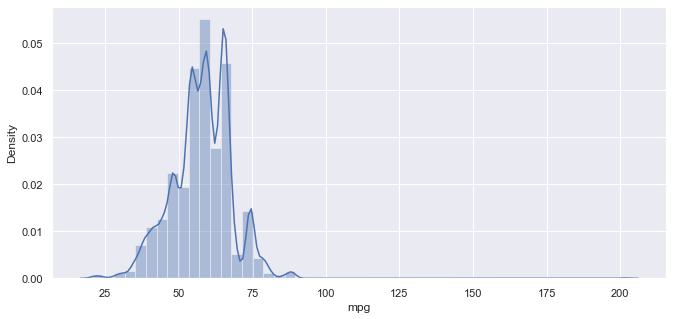

In [131]:
plt.figure(figsize =(11,5))
sns.distplot(data['mpg'])

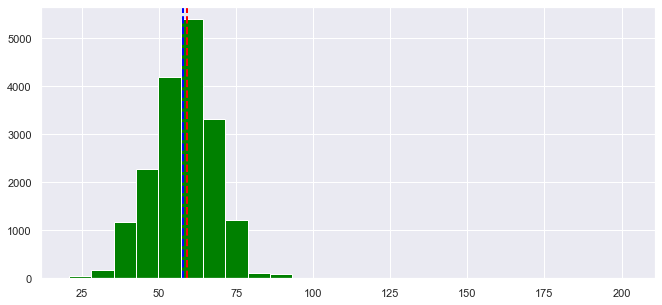

In [132]:
plt.figure(figsize =(11,5))
plt.hist(data['mpg'], color='green', bins =25)
plt.axvline(data['mpg'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(data['mpg'].median(), color ='red', linestyle = 'dashed', linewidth = 2)


In [133]:
data['engineSize'].describe()

count    17966.000000
mean         1.350807
std          0.432367
min          0.000000
25%          1.000000
50%          1.200000
75%          1.500000
max          5.000000
Name: engineSize, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engineSize', ylabel='Density'>

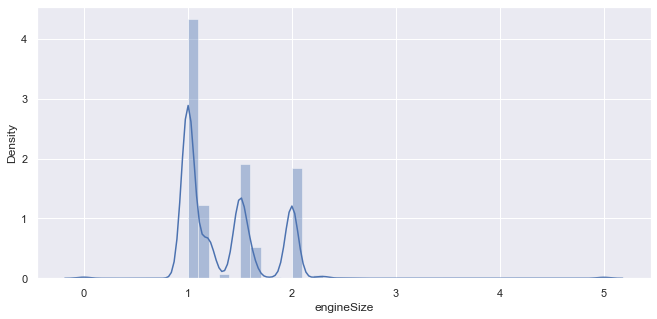

In [134]:
plt.figure(figsize =(11,5))
sns.distplot(data['engineSize'])

## Explorative Data Analysis Bivariate

In [135]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [136]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.636009,-0.707818,0.298506,-0.022967,-0.137311
price,0.636009,1.000000,-0.530659,0.406857,-0.346419,0.411178
mileage,-0.707818,-0.530659,1.000000,-0.260451,0.120075,0.215035
tax,0.298506,0.406857,-0.260451,1.000000,-0.502980,0.184363
mpg,-0.022967,-0.346419,0.120075,-0.502980,1.000000,-0.260521
engineSize,-0.137311,0.411178,0.215035,0.184363,-0.260521,1.000000


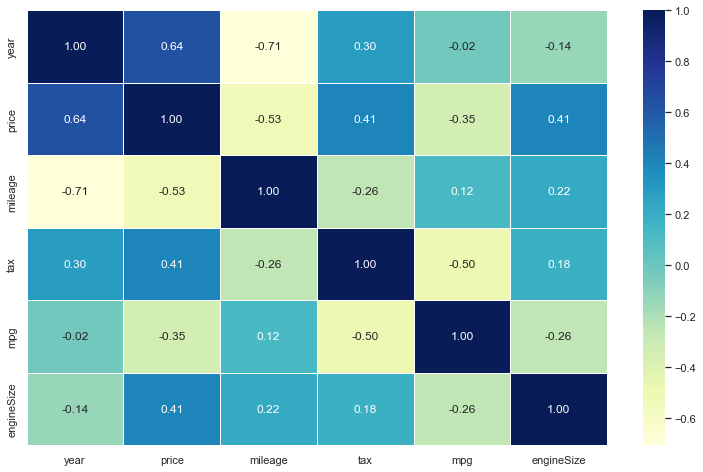

In [137]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize =(13, 8))
ax =sns.heatmap(corr_matrix, 
                annot =True, 
                linewidth =0.5,
               fmt=".2f",
               cmap ="YlGnBu")


## Building a Machine learning model (regression)

In [178]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [182]:
pd.get_dummies(data=data, columns=['model', 'transmission', 'fuelType'])

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,14000,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,13000,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,17500,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,16500,1482,145,48.7,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,8999,16700,150,47.1,1.4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,7499,40700,30,57.7,1.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,9999,7010,20,67.3,1.6,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,8299,5007,145,57.7,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [184]:
x=data.drop(['price'], axis = 'columns')
y= data['price']

In [187]:
X=pd.get_dummies(x)

In [188]:
X


,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57.7,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40.3,1.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48.7,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17962,2014,40700,30,57.7,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17963,2015,7010,20,67.3,1.6,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
17964,2018,5007,145,57.7,1.2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
